In [1]:
import PIL as pil
import numpy as np
import matplotlib.pyplot as plt
import  photutils as ph
from astropy.stats import sigma_clipped_stats
from astropy.stats import sigma_clip

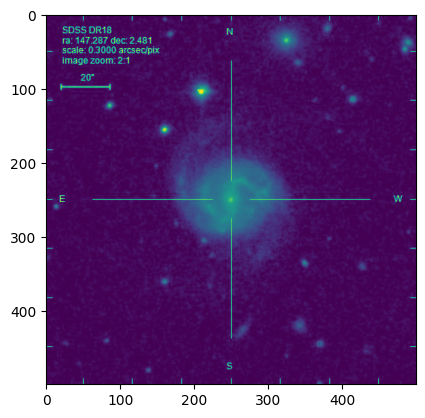

In [2]:
#Open image and convert it to numpy array
img=pil.Image.open("/home/kevin/aufklarung_astro_station/project2/images/image_147.28652ra_2.4808198dec_GALAXY_540602138078767104specObjID_SDSS_dr18.jpg")
img_array=np.array(img)
img_array.shape
img_array=img_array[:,:,1]
plt.imshow(img_array)

In [38]:
#Find star sources 

mean, median, std = sigma_clipped_stats(img_array, sigma=3.0)  
from photutils.detection import DAOStarFinder
daofind = DAOStarFinder(fwhm=20.0, threshold=10.*std)  
sources = daofind(img_array - median)  

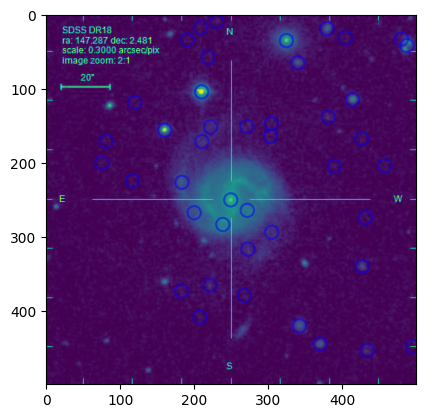

In [39]:
#Overlay source centroids on the image

from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils.aperture import CircularAperture

positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
apertures = CircularAperture(positions, r=9.0)

apertures.plot(color='blue', lw=1.5, alpha=0.5)
plt.imshow(img_array)


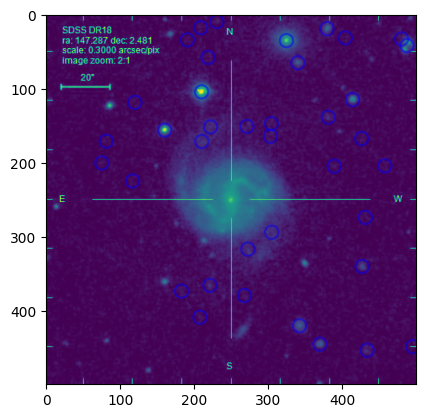

In [44]:

#Make a mask which doesnt let the galaxy be counted as stars
mask = np.zeros(img_array.shape, dtype=bool)
mask[180:300, 180:300] = True
sources = daofind(img_array - median, mask=mask)
positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
apertures = CircularAperture(positions, r=9.0)

apertures.plot(color='blue', lw=1.5, alpha=0.5)
plt.imshow(img_array)

